# 9.7 Solutions to Classroom Exercises

## Solution Exercise 9a

In [1]:
a = 5
b = 6

In [2]:
%%timeit
complex(a, b)

180 ns ± 6.08 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [3]:
%%timeit
a + 1j*b

88 ns ± 5.15 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Solution Exercise 9b

In [4]:
# copied in for comparison
def square_power(value, iterations):
    """Repeatedly square a value using **."""
    
    for _ in range(iterations):
        value = value ** 2
        
    return value
        
assert square_power(2, 1) == 4
assert square_power(2, 0) == 2

In [5]:
def square_multiply(value, iterations):
    """Repeatedly square a value using *."""
    
    for _ in range(iterations):
        value = value * value
    
    return value

assert square_multiply(2, 1) == 4
assert square_multiply(2, 0) == 2

In [6]:
%%timeit
square_power(1.9, 10)

926 ns ± 13.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
%%timeit
square_multiply(1.9, 10)

566 ns ± 7.42 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Solution Exercise 9c

In [8]:
# copied in to have array of complex values for running/timing function
import numpy as np

xmin = -1.5
ymin = -1.0
xmax = 0.5
ymax = 1.0
resolution = 300
xstep = (xmax - xmin) / resolution
ystep = (ymax - ymin) / resolution
xs = [(xmin + xstep * i) for i in range(resolution)]
ys = [(ymin + ystep * i) for i in range(resolution)]
# list with complex values
cs_listcomp = [[(x + y*1j) for x in xs] for y in ys]
cs = np.asarray(cs_listcomp)

Modified function:

In [9]:
def mandel_binary(constants, max_iterations=50):
    """Has the series diverged after all iterations?
    
    Stops values that have diverged from exploding.
    
    Returns an array with True if the series doesn't explode and False otherwise.
    """
    value = np.zeros(constants.shape)
    counter = 0
    while counter < max_iterations:
        value = (value*value) + constants
        diverging = abs(value) > 2
        # Avoid overflow
        value[diverging] = 2
        counter = counter + 1
    return abs(value) < 2

assert mandel_binary(np.asarray([0])) == np.asarray([True])
assert mandel_binary(np.asarray([4])) == np.asarray([False])

Time the performance:

In [10]:
%%timeit

result_binary = mandel_binary(cs)

28.7 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Plot the results:

In [11]:
result_binary = mandel_binary(cs)

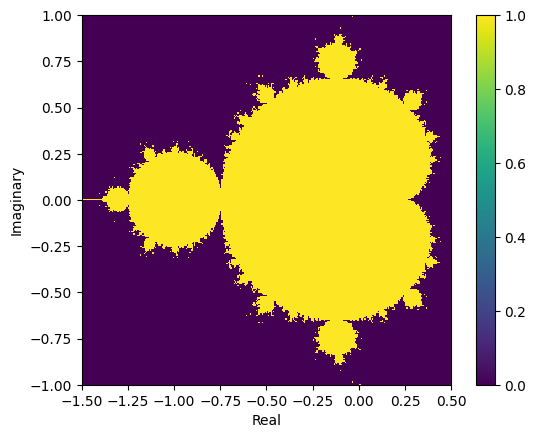

In [12]:
from matplotlib import pyplot as plt

plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.imshow(
    result_binary,
    interpolation="none",
    extent=[xmin, xmax, ymin, ymax],
    origin="lower"
)
plt.colorbar()

## Solution Exercise 9e

In [13]:
def time_pow_multiply(power):
    """Computes 2^power using multiplication (*)."""
    
    the_string = "2"
    
    for _ in range(power-1):
        the_string = the_string + " * 2"
    
    return repeat(
        the_string,
        number=100
    )

In [14]:
def time_pow_expo(power):
    """Computes 2^power using exponentiation (**)."""
    
    the_string = "2 ** " + str(power)
    
    return repeat(
        the_string,
        number=100
    )

Timing:

In [15]:
from timeit import repeat
time_pow_multiply(1_000)

[0.005543871000000422,
 0.005210179000002313,
 0.0051311619999978575,
 0.005094612000000609,
 0.005218352999996512]

In [16]:
time_pow_expo(1_000)

[7.319099999847367e-05,
 7.224600000199644e-05,
 7.085299999687322e-05,
 7.191899999980933e-05,
 7.078199999455137e-05]

Plots performance scaling:

In [17]:
# copied in for plotting
def plot_time(function, counts, title=None, top=None):
    plt.plot(counts, list(map(function, counts)))
    plt.ylim(bottom=0, top=top)
    plt.ylabel("seconds")
    plt.xlabel("array size")
    plt.title(title or function.__name__)

In [18]:
counts = np.arange(1, 1000, 100)

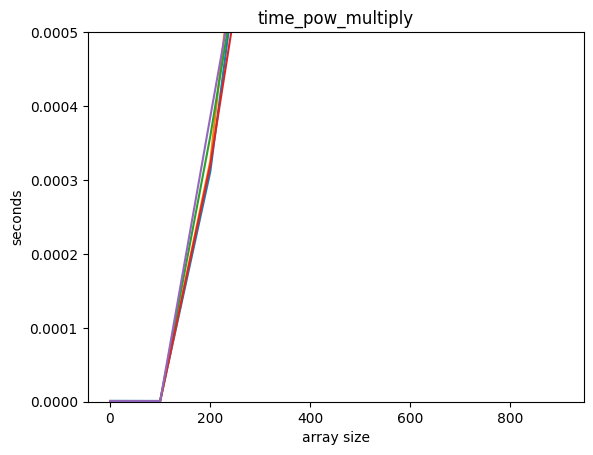

In [19]:
plot_time(time_pow_multiply, counts, top=0.0005)

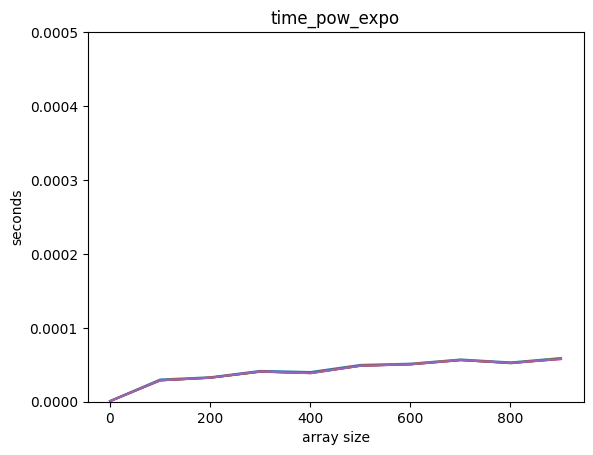

In [20]:
plot_time(time_pow_expo, counts, top=0.0005)

Conclusion:  
We can conclude that, while using `*` for exponentiation might be quicker for small exponents, somewhere around $x^{100}$, it becomes much faster to use `**`. 